# Linear Regression

>### [예제 6: SOL] Multi Variable Linear Regression (TF)

>### Load modules

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.18.5
TensorFlow Version :2.3.0
Matplotlib Version :3.2.2


> ### Input and Label

In [2]:
#Input(AGE) and Labels(BP)
x_input = tf.constant([[25,22],[25,26],[25,30],[35,22],[35,26],[35,30],[45,22],[45,26],[45,30],[55,22],[55,26],[55,30],[65,22],[65,26],[65,30],[73,22],[73,26],[73,30]], dtype= tf.float32)
labels = tf.constant([[118],[125],[130],[118],[126],[123],[120],[124],[130],[122],[125],[130],[127],[130],[130],[125.5],[130],[138]], dtype= tf.float32)

# W, B 선언
W = tf.Variable(tf.random.normal((2, 1)), dtype=tf.float32)
B = tf.Variable(tf.random.normal(()), dtype=tf.float32)

>### Hypothesis : Linear Equation (Multi-Variable)
>### $X = \begin{bmatrix} x_{11} & x_{12} \\ x_{21} & x_{22} \\ x_{31} & x_{32} \\ \end{bmatrix}$
>### $W = \begin{bmatrix} w_{1} \\ w_{2} \\\end{bmatrix}$
>### $H(x) = XW + b$

In [3]:
# hypothesis
def Hypothesis(x):
  return tf.matmul(x, W) + B

>### Cost Function : Mean Squared Error (MSE)
>### $\sum_{i=1}^{n}(h(x_{i})-y_{i})^{2}$

In [4]:
def Cost():
  return tf.reduce_mean(tf.square(Hypothesis(x_input)-labels))

### 학습 (Training)

In [5]:
%%time
# Parameter Set
epochs = 500000
learning_rate = 0.0002
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

training_idx = np.arange(0, epochs+1, 1)
cost_graph = np.zeros(epochs+1)

for cnt in range(0, epochs+1):
  cost_graph[cnt] = Cost()
  if cnt % (epochs/20) == 0:
    print("[{:>6}] cost = {:>10.4}, W = [ {:>7.4} {:>7.4} ], B = {:>7.4}".format(cnt, cost_graph[cnt], W[0][0], W[1][0], B.numpy()))

  optimizer.minimize(Cost,[W, B])

[     0] cost =      856.3, W = [   1.462   1.279 ], B =  0.7333
[ 25000] cost =      89.44, W = [  0.3537   3.664 ], B =   12.29
[ 50000] cost =      69.37, W = [  0.3292   3.331 ], B =   22.29
[ 75000] cost =      54.08, W = [  0.3077   3.041 ], B =   31.02
[100000] cost =      42.44, W = [   0.289   2.788 ], B =   38.64
[125000] cost =      33.57, W = [  0.2727   2.567 ], B =   45.29
[150000] cost =      26.82, W = [  0.2584   2.374 ], B =   51.09
[175000] cost =      21.68, W = [   0.246   2.206 ], B =   56.16
[200000] cost =      17.77, W = [  0.2352   2.059 ], B =   60.58
[225000] cost =      14.78, W = [  0.2257   1.931 ], B =   64.43
[250000] cost =      12.51, W = [  0.2174   1.818 ], B =    67.8
[275000] cost =      10.78, W = [  0.2102   1.721 ], B =   70.74
[300000] cost =      9.466, W = [  0.2039   1.636 ], B =    73.3
[325000] cost =      8.469, W = [  0.1985   1.562 ], B =   75.52
[350000] cost =      7.701, W = [  0.1936   1.496 ], B =   77.49
[375000] cost =      7.12

>### Hypothesis Test 

In [6]:
print("[ Hypothesis test ]")

H_x = Hypothesis(x_input)
for x,h,l in zip(x_input, H_x, labels):
  print("Age : {}, BMI : {:>7.4} => BP : {:>7.4} [label => {}]".format(x[0],x[1],h[0],l))

[ Hypothesis test ]
Age : 25.0, BMI :    22.0 => BP :   116.8 [label => [118.]]
Age : 25.0, BMI :    26.0 => BP :   121.8 [label => [125.]]
Age : 25.0, BMI :    30.0 => BP :   126.8 [label => [130.]]
Age : 35.0, BMI :    22.0 => BP :   118.5 [label => [118.]]
Age : 35.0, BMI :    26.0 => BP :   123.5 [label => [126.]]
Age : 35.0, BMI :    30.0 => BP :   128.5 [label => [123.]]
Age : 45.0, BMI :    22.0 => BP :   120.3 [label => [120.]]
Age : 45.0, BMI :    26.0 => BP :   125.3 [label => [124.]]
Age : 45.0, BMI :    30.0 => BP :   130.3 [label => [130.]]
Age : 55.0, BMI :    22.0 => BP :   122.1 [label => [122.]]
Age : 55.0, BMI :    26.0 => BP :   127.0 [label => [125.]]
Age : 55.0, BMI :    30.0 => BP :   132.0 [label => [130.]]
Age : 65.0, BMI :    22.0 => BP :   123.8 [label => [127.]]
Age : 65.0, BMI :    26.0 => BP :   128.8 [label => [130.]]
Age : 65.0, BMI :    30.0 => BP :   133.8 [label => [130.]]
Age : 73.0, BMI :    22.0 => BP :   125.2 [label => [125.5]]
Age : 73.0, BMI :  

In [7]:
# predict
x_test = tf.constant([[50.0, 25.0]], dtype= tf.float32)
H_x = Hypothesis(x_test)
print("\n[ Prediction by specific data ]")
print("Age : {}, BMI : {} => BP : {:>7.4}".format(x_test[0][0],x_test[0][1],H_x[0][0]))


[ Prediction by specific data ]
Age : 50.0, BMI : 25.0 => BP :   124.9


>### Plotting

<function matplotlib.pyplot.show>

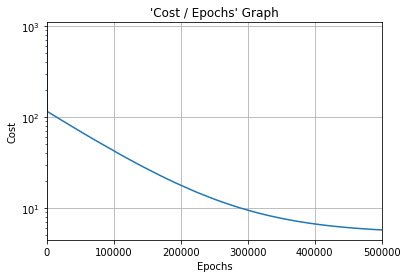

In [8]:
# Training 상황에 대한 그래프 출력
# Training 회수 별 Cost 값
plt.title("'Cost / Epochs' Graph")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(training_idx, cost_graph)
plt.xlim(0, epochs)
plt.grid(True)
plt.semilogy()
plt.show